In [1]:
import sys
#sys.path.append("contrastive-ne/cne")
sys.path.append("../code")

#print(sys.executable)
print(sys.version)
print(sys.version_info)

import cne
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import mnist_reader 
    
X_train, y_train = mnist_reader.load_mnist('../data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/mnist', kind='t10k')

X_train = X_train.astype(np.float32)

print(X_train.shape, y_train.shape)

3.9.16 (main, Dec  7 2022, 01:11:58) 
[GCC 7.5.0]
sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)
(60000, 784) (60000,)


In [15]:
learning_rates = np.arange(1.0,0.0,-0.1)
print(learning_rates)

n_runs = 10

[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


<h1>NEG-t-SNE</h1>

Computing approximate kNN graph


Finished epoch 0/50
Finished epoch 10/50
Finished epoch 20/50
Finished epoch 30/50
Finished epoch 40/50


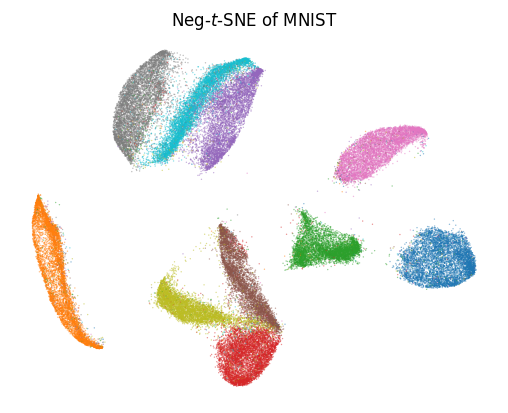

In [20]:
#reference run
embedder_neg = cne.CNE(loss_mode="neg",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=True,
                       learning_rate=1.0,
                       print_freq_epoch=10)

embd_neg = embedder_neg.fit_transform(X_train)

with open('outputs/neg_tsne_reference.npy', 'wb') as f:
    np.save(f, embd_neg)

plt.figure()
plt.scatter(*embd_neg.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"Neg-$t$-SNE of MNIST")
plt.show()

Computing approximate kNN graph


Finished epoch 0/50
Finished epoch 10/50
Finished epoch 20/50
Finished epoch 30/50
Finished epoch 40/50


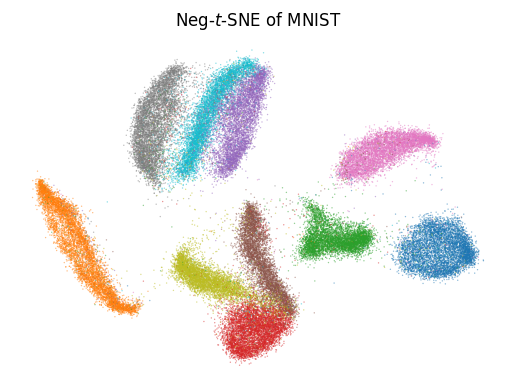

In [19]:
#reference run
embedder_neg = cne.CNE(loss_mode="neg",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=False,
                       learning_rate=1.0,
                       print_freq_epoch=10)

embd_neg = embedder_neg.fit_transform(X_train)

#with open('outputs/neg_tsne_reference.npy', 'wb') as f:
#    np.save(f, embd_neg)

plt.figure()
plt.scatter(*embd_neg.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"Neg-$t$-SNE of MNIST")
plt.show()

In [17]:
#Runs without annealing
for lr in learning_rates:
    embeddings = []
    for i in range(n_runs):
        embedder_neg = cne.CNE(loss_mode="neg",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=False,
                       learning_rate=lr,
                       print_freq_epoch=100)

        embd_neg = embedder_neg.fit_transform(X_train)
        embeddings.append(embd_neg)
    embeddings = np.array(embeddings)
    
    with open('outputs/neg_tsne_'+str(lr)+'_no_anneal.npy', 'wb') as f:
        np.save(f,embeddings)
        
    print('completed lr: ', lr, ' remaining runs: ', lr/0.1-1)
        

Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.0  remaining runs:  9.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.9  remaining runs:  8.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.8  remaining runs:  7.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.7000000000000001  remaining runs:  6.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.6000000000000001  remaining runs:  5.000000000000001
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.5000000000000001  remaining runs:  4.000000000000001
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.40000000000000013  remaining runs:  3.000000000000001
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.30000000000000016  remaining runs:  2.0000000000000013
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.20000000000000018  remaining runs:  1.0000000000000018
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.1000000000000002  remaining runs:  1.9984014443252818e-15


In [25]:
ext_learning_rates = np.arange(1.1,1.6,0.1)

#Runs without annealing
for lr in ext_learning_rates:
    embeddings = []
    for i in range(n_runs):
        embedder_neg = cne.CNE(loss_mode="neg",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=False,
                       learning_rate=lr,
                       print_freq_epoch=100)

        embd_neg = embedder_neg.fit_transform(X_train)
        embeddings.append(embd_neg)
    embeddings = np.array(embeddings)
    
    with open('outputs/neg_tsne_'+str(lr)+'_no_anneal.npy', 'wb') as f:
        np.save(f,embeddings)
        
    print('completed lr: ', lr, ' remaining runs: ', np.sum(ext_learning_rates>lr))
        

Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.1  remaining runs:  4
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.2000000000000002  remaining runs:  3
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.3000000000000003  remaining runs:  2
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.4000000000000004  remaining runs:  1
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.5000000000000004  remaining runs:  0


<h1>UMAP</h1>

Computing approximate kNN graph


Finished epoch 0/50
Finished epoch 10/50
Finished epoch 20/50
Finished epoch 30/50
Finished epoch 40/50


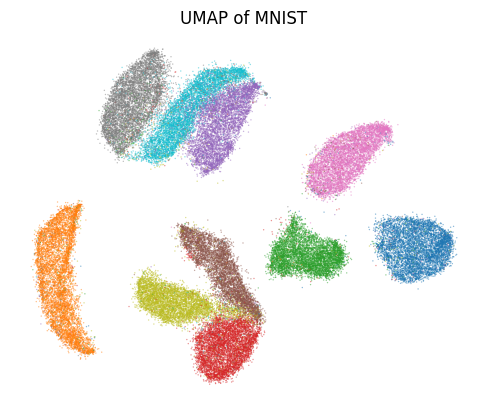

In [21]:
#reference run
embedder_umap = cne.CNE(loss_mode="umap",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=True,
                       learning_rate=1.0,
                       print_freq_epoch=10)

embd_umap = embedder_umap.fit_transform(X_train)

with open('outputs/umap_reference_lr_1.0.npy', 'wb') as f:
    np.save(f, embd_umap)

plt.figure()
plt.scatter(*embd_umap.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"UMAP of MNIST")
plt.show()

In [16]:
for lr in learning_rates:
    embeddings = []
    for i in range(n_runs):
        embedder_umap = cne.CNE(loss_mode="umap",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=False,
                       learning_rate=lr,
                       print_freq_epoch=100)
        embd_umap = embedder_umap.fit_transform(X_train)
        embeddings.append(embd_umap)
        
    with open('outputs/umap_'+str(lr)+'_no_anneal.npy', 'wb') as f:
        np.save(f, embeddings)
        
    print('completed lr: ', lr, ' remaining runs: ', lr/0.1-1)

Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  1.0  remaining runs:  9.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.9  remaining runs:  8.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.8  remaining runs:  7.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.7000000000000001  remaining runs:  6.0
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.6000000000000001  remaining runs:  5.000000000000001
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.5000000000000001  remaining runs:  4.000000000000001
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.40000000000000013  remaining runs:  3.000000000000001
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.30000000000000016  remaining runs:  2.0000000000000013
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.20000000000000018  remaining runs:  1.0000000000000018
Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


Computing approximate kNN graph


Finished epoch 0/50


completed lr:  0.1000000000000002  remaining runs:  1.9984014443252818e-15


Computing approximate kNN graph


Finished epoch 0/50
Finished epoch 10/50
Finished epoch 20/50
Finished epoch 30/50
Finished epoch 40/50


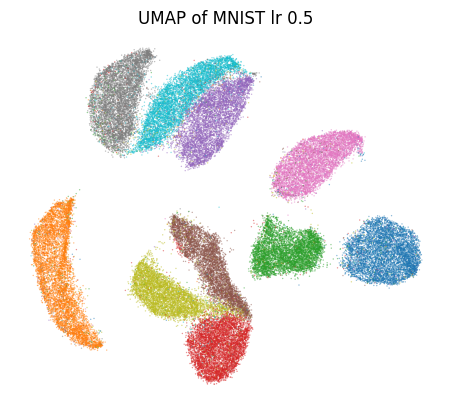

In [24]:
#reference run
embedder_umap = cne.CNE(loss_mode="umap",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=True,
                       learning_rate=0.5,
                       print_freq_epoch=10)

embd_umap = embedder_umap.fit_transform(X_train)

with open('outputs/umap_reference_lr_0.5.npy', 'wb') as f:
    np.save(f, embd_umap)

plt.figure()
plt.scatter(*embd_umap.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"UMAP of MNIST lr 0.5")
plt.show()

Computing approximate kNN graph


Finished epoch 0/50
Finished epoch 10/50
Finished epoch 20/50
Finished epoch 30/50
Finished epoch 40/50


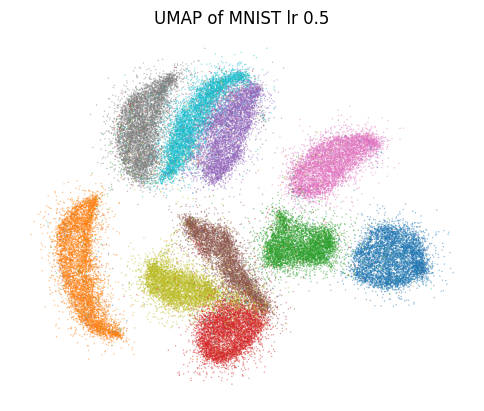

In [12]:
#reference run
embedder_umap = cne.CNE(loss_mode="umap",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=False,
                       learning_rate=0.5,
                       print_freq_epoch=10)

embd_umap = embedder_umap.fit_transform(X_train)

with open('outputs/umap_reference_lr_0.5_no_anneal.npy', 'wb') as f:
    np.save(f, embd_umap)

plt.figure()
plt.scatter(*embd_umap.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"UMAP of MNIST lr 0.5")
plt.show()

Computing approximate kNN graph


Finished epoch 0/50
Finished epoch 10/50
Finished epoch 20/50
Finished epoch 30/50
Finished epoch 40/50


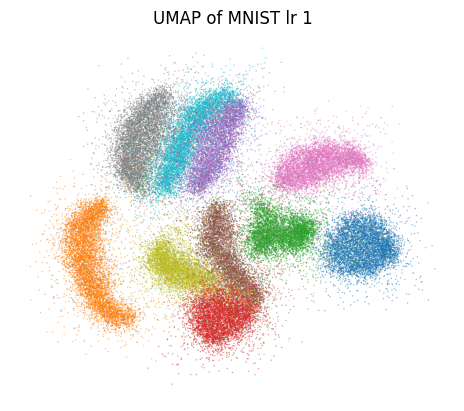

In [10]:
#reference run
embedder_umap = cne.CNE(loss_mode="umap",
                       k=30,
                       optimizer="sgd",
                       momentum=0.0,
                       parametric=False,
                       anneal_lr=False,
                       learning_rate=1.0,
                       print_freq_epoch=10)

embd_umap = embedder_umap.fit_transform(X_train)

#with open('outputs/umap_reference_lr_0.5.npy', 'wb') as f:
#    np.save(f, embd_umap)

plt.figure()
plt.scatter(*embd_umap.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"UMAP of MNIST lr 1")
plt.show()